<a href="https://colab.research.google.com/github/douglassodre/capacidadehospitalargoias_covid19/blob/main/Evolu%C3%A7%C3%A3o_da_capacidade_hospitalar_(n%C3%BAmero_de_leitos)_durante_a_pandemia_de_Covid_19_em_Goi%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import requests
from bs4 import BeautifulSoup

In [44]:
!pip install pysus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from pysus.online_data.CNES import download
estados =['GO']
grupo =['LT']
anos = [2020,2021,2022]
mes = [1,2,3,4,5,6,7,8,9,10,11]
banco={}
for y in anos:
    if y == 2022:
      mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    else:
      mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    for m in mes:
      for g in grupo:
        for uf in estados:
            banco[uf, y, m, g] = download(state = uf, year=y, month=m, group=g)
            print("Banco de " + str(y) + " de " + str(m) + " de " + str(uf) + " baixado!")

Banco de 2020 de 1 de GO baixado!
Banco de 2020 de 2 de GO baixado!
Banco de 2020 de 3 de GO baixado!
Banco de 2020 de 4 de GO baixado!
Banco de 2020 de 5 de GO baixado!
Banco de 2020 de 6 de GO baixado!
Banco de 2020 de 7 de GO baixado!
Banco de 2020 de 8 de GO baixado!
Banco de 2020 de 9 de GO baixado!
Banco de 2020 de 10 de GO baixado!
Banco de 2020 de 11 de GO baixado!
Banco de 2020 de 12 de GO baixado!
Banco de 2021 de 1 de GO baixado!
Banco de 2021 de 2 de GO baixado!
Banco de 2021 de 3 de GO baixado!
Banco de 2021 de 4 de GO baixado!
Banco de 2021 de 5 de GO baixado!
Banco de 2021 de 6 de GO baixado!
Banco de 2021 de 7 de GO baixado!
Banco de 2021 de 8 de GO baixado!
Banco de 2021 de 9 de GO baixado!
Banco de 2021 de 10 de GO baixado!
Banco de 2021 de 11 de GO baixado!
Banco de 2021 de 12 de GO baixado!
Banco de 2022 de 1 de GO baixado!
Banco de 2022 de 2 de GO baixado!
Banco de 2022 de 3 de GO baixado!
Banco de 2022 de 4 de GO baixado!
Banco de 2022 de 5 de GO baixado!
Banco de

In [46]:
todos = pd.concat({ k: pd.DataFrame.from_dict(v) for k, v in    banco.items() }, axis=0).reset_index()
todos

,level_0,level_1,level_2,level_3,level_4,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,...,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,GO,2020,1,LT,0,9331603,520010,,,,...,,,2,33,9,0,9,0,202001,1244
1,GO,2020,1,LT,1,2335506,520013,15,,,...,,,4,43,3,0,3,0,202001,2062
2,GO,2020,1,LT,2,2335506,520013,15,,,...,,,1,03,2,0,1,1,202001,2062
3,GO,2020,1,LT,3,2335506,520013,15,,,...,,,2,41,2,0,2,0,202001,2062
4,GO,2020,1,LT,4,2335506,520013,15,,,...,,,6,34,4,0,3,1,202001,2062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103493,GO,2022,11,LT,2939,2383691,522205,001,,,...,,,1,03,3,0,3,0,202211,1244
103494,GO,2022,11,LT,2940,2383691,522205,001,,,...,,,4,10,3,0,3,0,202211,1244
103495,GO,2022,11,LT,2941,2439883,522220,02,,,...,,,2,33,7,0,7,0,202211,1244
103496,GO,2022,11,LT,2942,2439883,522220,02,,,...,,,4,43,2,0,2,0,202211,1244


In [55]:
# Webscrapping (esta etapa serve para coletar o nome dos municípios, usaremos mais a frente)
response = requests.get('https://www.ibge.gov.br/explica/codigos-dos-municipios.php')
soup = BeautifulSoup(response.text, 'html.parser')
thead = soup.find(id='GO')
tbody = thead.find_next_sibling('tbody')
municipios = []


for row in tbody.find_all('tr'):
  cells = row.find_all('td')
  if len(cells) == 2:
    nome = cells[0].text.strip()
    codigo = cells[1].text.strip()
    municipios.append({'nome': nome, 'codigo': codigo})

# Crie o dataframe a partir da lista de municípios
df_mun = pd.DataFrame(municipios)
df_mun['codigo'] = df_mun['codigo'].str.slice(stop=-1)

# municípios do dataframe
df_mun

,nome,codigo
0,Abadia de Goiás,520005
1,Abadiânia,520010
2,Acreúna,520013
3,Adelândia,520015
4,Água Fria de Goiás,520017
...,...,...
241,Varjão,522190
242,Vianópolis,522200
243,Vicentinópolis,522205
244,Vila Boa,522220


In [48]:
# Função para realizar uma análise inicial do conjunto de dados:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-' * 50)
    print('TIPO DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-' * 50)
    print('VALORES UNICOS POR FEATURE', '\n')
    print(data.nunique())
    print('\n', '-' * 50)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum())

show_info(todos)

DATASET SHAPE:  (103498, 33) 

--------------------------------------------------
TIPO DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103498 entries, 0 to 103497
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   level_0   103498 non-null  object
 1   level_1   103498 non-null  int64 
 2   level_2   103498 non-null  int64 
 3   level_3   103498 non-null  object
 4   level_4   103498 non-null  int64 
 5   CNES      103498 non-null  object
 6   CODUFMUN  103498 non-null  object
 7   REGSAUDE  103498 non-null  object
 8   MICR_REG  103498 non-null  object
 9   DISTRSAN  103498 non-null  object
 10  DISTRADM  103498 non-null  object
 11  TPGESTAO  103498 non-null  object
 12  PF_PJ     103498 non-null  object
 13  CPF_CNPJ  103498 non-null  object
 14  NIV_DEP   103498 non-null  object
 15  CNPJ_MAN  103498 non-null  object
 16  ESFERA_A  103498 non-null  object
 17  ATIVIDAD  103498 non-null  object


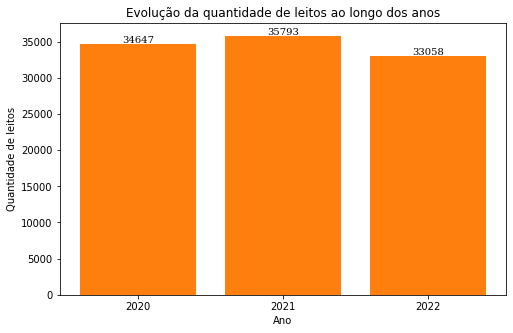

In [49]:
# Agrupe os dados pelo ano
leitos_por_ano = todos.groupby(['level_1'])['CODLEITO'].count()

# Cria um background
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.bar(leitos_por_ano.index, leitos_por_ano, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6)

# Configure os valores do eixo x
plt.xticks(anos)

# Quantidade de leitos por ano
plt.bar(leitos_por_ano.index, leitos_por_ano.values)
plt.xticks(leitos_por_ano.index, anos)
plt.xlabel('Ano')
plt.ylabel('Quantidade de leitos')
plt.title('Evolução da quantidade de leitos ao longo dos anos')



# Adiciona rótulos
for i in leitos_por_ano.index:
    ax.annotate(f"{leitos_por_ano[i]}", 
                   xy=(i, leitos_por_ano[i] + 500), #esta linha altera a altura do rótulo.
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

plt.show()

In [50]:
# Armazenar resultado
resultado = ""

# Verificando os valores do dataframe
for i in range(1, len(leitos_por_ano)):
  # Calcule a alteração percentual em relação ao ano anterior
  alteracao = (leitos_por_ano.iloc[i] - leitos_por_ano.iloc[i-1]) / leitos_por_ano.iloc[i-1]
  # Resultado ao texto de resultado
  resultado += f"No ano de {leitos_por_ano.index[i]}, houve uma alteração de {alteracao:.2f}% em relação ao ano anterior.\n"

#Alteração % de leitos em relação ao ano anterior analisado
print(resultado)

No ano de 2021, houve uma alteração de 0.03% em relação ao ano anterior.
No ano de 2022, houve uma alteração de -0.08% em relação ao ano anterior.



In [56]:
# Faça a junção dos dois dataframes usando a coluna 'codigo' do dataframe 'df_mun' e a coluna 'CODUFMUN' do dataframe 'todos'
todos_merged = todos.merge(df_mun, left_on='CODUFMUN', right_on='codigo')

# dataframe resultante
todos_merged

,level_0,level_1,level_2,level_3,level_4,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,...,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,nome,codigo
0,GO,2020,1,LT,0,9331603,520010,,,,...,2,33,9,0,9,0,202001,1244,Abadiânia,520010
1,GO,2020,2,LT,0,9331603,520010,,,,...,2,33,9,0,9,0,202002,1244,Abadiânia,520010
2,GO,2020,3,LT,0,9331603,520010,,,,...,2,33,9,0,9,0,202003,1244,Abadiânia,520010
3,GO,2020,4,LT,0,9331603,520010,,,,...,2,33,9,0,9,0,202004,1244,Abadiânia,520010
4,GO,2020,5,LT,0,9331603,520010,,,,...,2,33,9,0,9,0,202005,1244,Abadiânia,520010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103493,GO,2022,10,LT,2721,2962438,521990,,,,...,2,33,3,0,3,0,202210,1244,São Francisco de Goiás,521990
103494,GO,2022,11,LT,2700,2535319,521990,1,,,...,2,33,7,0,7,0,202211,1244,São Francisco de Goiás,521990
103495,GO,2022,11,LT,2701,2535319,521990,1,,,...,3,95,1,0,1,0,202211,1244,São Francisco de Goiás,521990
103496,GO,2022,11,LT,2702,2962438,521990,,,,...,7,07,1,0,1,0,202211,1244,São Francisco de Goiás,521990


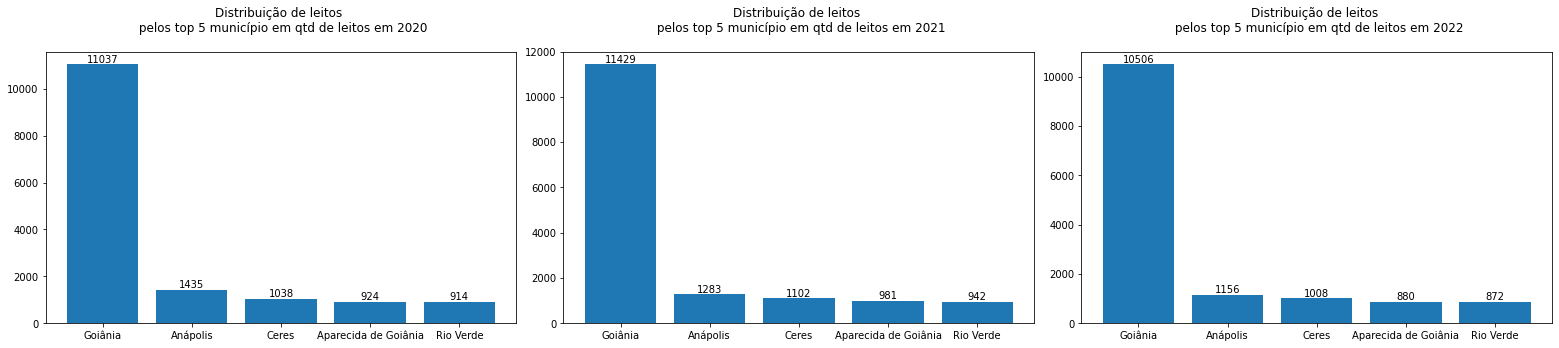

In [96]:
# Selecione os anos que você deseja plotar
years = [2020, 2021, 2022]

# Crie o gráfico com três subplots, um para cada ano
fig, ax = plt.subplots(1, len(years), figsize=(27, 5))
plt.subplots_adjust(wspace=0.1)

# Para cada ano, crie um gráfico de barras mostrando a distribuição dos leitos por município
for i, year in enumerate(years):
  # Selecione os dados para o ano atual
  data_year = todos_merged[todos_merged['level_1'] == year]
  
  # Agrupe os dados por município e some os leitos para cada município
  data_year_grouped = data_year.groupby('nome')['CODLEITO'].count()
  
  # Selecione os 5 municípios com mais leitos
  data_year_grouped_top5 = data_year_grouped.sort_values(ascending=False).head(5)
  
  # Crie o gráfico de barras
  ax[i].bar(data_year_grouped_top5.index, data_year_grouped_top5.values)
  
  # Adicione o número que representa a quantidade da barra em cada gráfico
  for x, y in zip(data_year_grouped_top5.index, data_year_grouped_top5.values):
      ax[i].text(x, y, y, ha='center', va='bottom')
  
  # Adicione um título ao gráfico, afastando-o da parte superior da figura
  ax[i].set_title(f'Distribuição de leitos \n pelos top 5 município em qtd de leitos em {year}', y=1.05)

# Mostre o gráfico
plt.show()

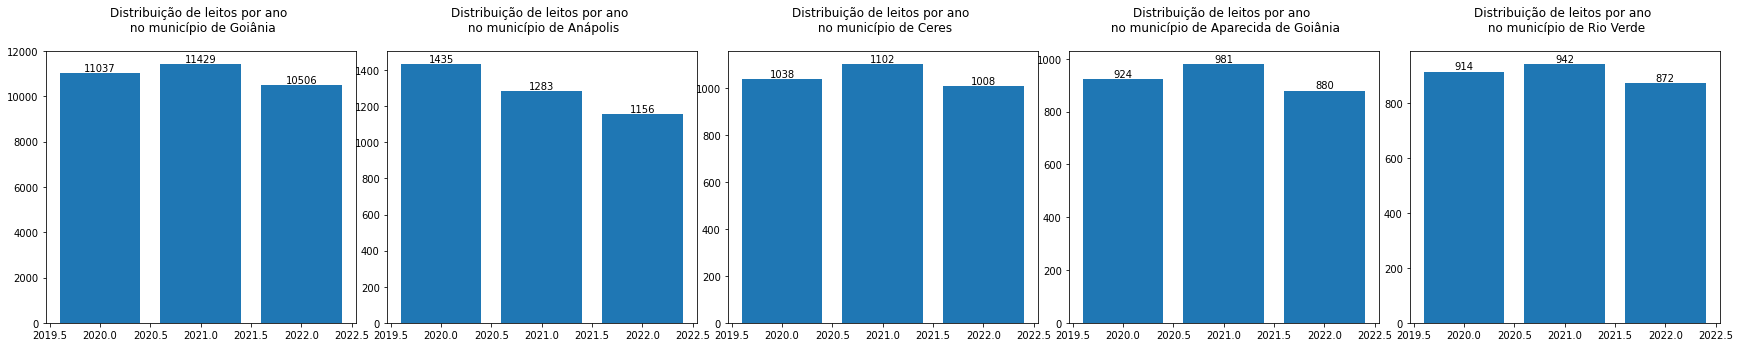

In [122]:
# Selecione os anos que você deseja plotar
municipios = ['Goiânia', 'Anápolis', 'Ceres', 'Aparecida de Goiânia', 'Rio Verde']

# Crie o gráfico com cinco subplots, um para cada município
#fig, ax = plt.subplots(len(municipios), 1, figsize=(12, 5))
fig, ax = plt.subplots(1, len(municipios), figsize=(30, 5))
plt.subplots_adjust(wspace=0.1)

# Para cada município, crie um gráfico de barras mostrando a distribuição dos leitos por ano
for i, municipio in enumerate(municipios):
  # Selecione os dados para o município atual
  data_municipio = todos_merged[todos_merged['nome'] == municipio]
  
  # Agrupe os dados por ano e some os leitos para cada ano
  data_municipio_grouped = data_municipio.groupby('level_1')['CODLEITO'].count()
  
  # Crie o gráfico de barras
  ax[i].bar(data_municipio_grouped.index, data_municipio_grouped.values)
  
  # Adicione o número que representa a quantidade da barra em cada gráfico
  for x, y in zip(data_municipio_grouped.index, data_municipio_grouped.values):
      ax[i].text(x, y, y, ha='center', va='bottom')
  
  # Adicione um título ao gráfico, afastando-o da parte superior da figura
  ax[i].set_title(f'Distribuição de leitos por ano \n no município de {municipio}', y=1.05)

# Mostre o gráfico
plt.show()

In [128]:
# Armazenar o texto de resultado
resultado = ""

# Para cada município
for municipio in municipios:
  # Selecione os dados para o município atual
  data_municipio = todos_merged[todos_merged['nome'] == municipio]

  # Agrupe os dados por ano e some os leitos para cada ano
  leitos_por_ano = data_municipio.groupby('level_1')['CODLEITO'].count()

  # Adicione o título do município ao resultado
  resultado += f"Município de {municipio}:\n"

  # Verificando os valores do dataframe
  for i in range(1, len(leitos_por_ano)):
    # Calcule a alteração percentual em relação ao ano anterior
    alteracao = (leitos_por_ano.iloc[i] - leitos_por_ano.iloc[i-1]) / leitos_por_ano.iloc[i-1]
    # Adicione o resultado ao texto de resultado
    resultado += f"No ano de {leitos_por_ano.index[i]}, houve uma alteração de {alteracao:.2f}% em relação ao ano anterior.\n"

  # Adicione uma linha em branco após cada município
  resultado += "\n"

# Imprima o resultado informando a alteração % de leitos em relação ao ano anterior analisado
print(resultado)

Município de Goiânia:
No ano de 2021, houve uma alteração de 0.04% em relação ao ano anterior.
No ano de 2022, houve uma alteração de -0.08% em relação ao ano anterior.

Município de Anápolis:
No ano de 2021, houve uma alteração de -0.11% em relação ao ano anterior.
No ano de 2022, houve uma alteração de -0.10% em relação ao ano anterior.

Município de Ceres:
No ano de 2021, houve uma alteração de 0.06% em relação ao ano anterior.
No ano de 2022, houve uma alteração de -0.09% em relação ao ano anterior.

Município de Aparecida de Goiânia:
No ano de 2021, houve uma alteração de 0.06% em relação ao ano anterior.
No ano de 2022, houve uma alteração de -0.10% em relação ao ano anterior.

Município de Rio Verde:
No ano de 2021, houve uma alteração de 0.03% em relação ao ano anterior.
No ano de 2022, houve uma alteração de -0.07% em relação ao ano anterior.


